<a href="https://colab.research.google.com/github/Blessing988/Cholesky-Decomposition/blob/main/Machine_Learning_Seminar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probabilistic Reasoning and Machine Learning

*Dr. Kojo Sarfo Gyamfi (Data Scientist, Twitter)*


> *The actual science of logic is conversant at present only with things either certain, impossible, or entirely doubtful, none of which (fortunately) we have to reason on. Therefore the true logic for this world is the calculus of Probabilities, which takes account of the magnitude of the probability which is, or ought to be, in a reasonable man's mind.*

> *- James Clerk Maxwell*

## Instructions for using this notebook
> Option 1 : If you can have internet access during the seminar (preferred):
- Create a Google account, if you don't already have one.
- Save a personal copy of this notebook ("File" --> "Save a copy in Drive") which you would use for the practice session.


> Option 2: If, on the other hand, you cannot have internet access during the seminar, then go through the following steps prior to the seminar:
- Download Anaconda from here: https://www.anaconda.com/products/individual.
- After installing, this should install a standalone Jupyter Notebook application.
- Open the Jupyter Notebook from your computer. This should open in a browser tab.
- Download a personal copy of this notebook ("File" -> "Download" -> "Download .ipynb") which you would use for the practice session.
- In the Jupyter tab in your browser, navigate the directory to the download folder and locate the downloaded file from the previous file.
- Run the notebook.

## Content
- Artificial Intelligence (AI) and why it matters
- Introduction to Machine Learning (ML)
- Bayes Classifier
- Naive Bayes
- Linear and Quadratic Discriminant Analysis
- Maximum Likelihood Estimation
- Logistic Regression and Gradient Descent
- Introduction to Neural Networks

## Artificial Intelligence (AI) and why it matters

> "Intelligence demonstrated by machines, as opposed to natural intelligence displayed by animals including humans." - Wikipedia

> "Machines" refer to: software systems, not necessarily robots

> AI includes:
- Learning
- Reasoning
- Knowledge representation
- Planning
- Perception (mostly computer vision (CV))
- Natural language processing (NLP)

> We do not currently have artificial **_general_** intelligence; Google's 2017 paper: One Model to Learn them All (https://arxiv.org/abs/1706.05137) is concerned only with learning across a set of CV and NLP tasks.

> Current AI systems solve very specific learning and optimisation tasks:

- Energy demand forecasting and optimal energy allocation
- Fault detection in smart grids and optimised operation
- Detection of wireless sensor network failure
- Signal detection in massive MIMO (multiple input, multiple output) antenna systems
- Predicting churn for telecom operators
- Poultry health management with computer vision
- Optimising mining operations
- Sales forecasting and price optimisation
- Diagnosing diseases such as cancer, diabetes, COVID-19/ medical assistive technology, e,g., in radiology/ robotic surgery
- **Predicting level of engagement on a Twitter ad**

... and there are even more mundane things:
- article writing (https://www.theguardian.com/commentisfree/2020/sep/08/robot-wrote-this-article-gpt-3)

> Whatever your interest, chances are AI (using data) could probably do a better job!

> According to the World Economic Forum in 2020, AI will displace about 85 million jobs by 2025

- Manufacturing
- Engineering (traditional)
- Medicine
- Accounting
- Taxi driving
- Pharmaceuticals
- Retail

... but it would create 97 million new ones:
- Software engineering
- Science (including data science)
- Product design
- Project/team/product management
- Writing (poetry, novels)

> The part about AI concerned with learning, i.e., creating a system that learns from data on its own how to do any of the above specific tasks is "Machine Learning" 

## Introduction to Machine Learning

> **Learning** from **data**

> Data
 - Experimental data, survey data, Facebook feed, sales data, medical records, etc.
 - Forms: Tabular, text, images, etc.

> Learning
 - Supervised learning
 - Unsupervised learning
 - Reinforcement learning

### Data

In [ ]:
import pandas as pd

#### Dataset 1 - California housing data

In [ ]:
from sklearn.datasets import fetch_california_housing

In [ ]:
california_object = fetch_california_housing(as_frame=True)
df1 = california_object.data
df1['median_house_value'] = california_object.target
df1 = df1.sample(frac=1, random_state=42)
df1.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_house_value
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01,0.47700
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46,0.45800
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44,5.00001
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72,2.18600
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93,2.78000


> Troubleshooting:
If the above cell fails to run, upgrade sklearn by running the following in a code cell:

`!pip install -U scikit-learn`

- Then, delete or comment out the cell you create, and restart the runtime

In [ ]:
df1.shape

(20640, 9)

> Example task: predict `median_house_value`
- Regression (real, continuous output)

> Target, or label, or dependent variable: `median_house_value`

> Features, or input variables, or dependent variables:
`'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'`


> Number of rows $n = 20640$

> Number of features $d = 8$ (dimensionality)

#### Dataset 2 - Breast Cancer

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
breast_cancer_object = load_breast_cancer(as_frame=True)
df2 = breast_cancer_object.data
df2['malignant'] = breast_cancer_object.target
df2 = df2.sample(frac=1, random_state=42)
df2.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,malignant
204,12.47,18.60,81.09,481.9,0.09965,0.1058,0.08005,0.03821,0.1925,0.06373,0.3961,1.0440,2.497,30.29,0.006953,0.01911,0.02701,0.01037,0.01782,0.003586,14.97,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.10150,0.3014,0.08750,1
70,18.94,21.31,123.60,1130.0,0.09009,0.1029,0.10800,0.07951,0.1582,0.05461,0.7888,0.7975,5.486,96.05,0.004444,0.01652,0.02269,0.01370,0.01386,0.001698,24.86,26.58,165.90,1866.0,0.1193,0.2336,0.2687,0.17890,0.2551,0.06589,0
131,15.46,19.48,101.70,748.9,0.10920,0.1223,0.14660,0.08087,0.1931,0.05796,0.4743,0.7859,3.094,48.31,0.006240,0.01484,0.02813,0.01093,0.01397,0.002461,19.26,26.00,124.90,1156.0,0.1546,0.2394,0.3791,0.15140,0.2837,0.08019,0
431,12.40,17.68,81.47,467.8,0.10540,0.1316,0.07741,0.02799,0.1811,0.07102,0.1767,1.4600,2.204,15.43,0.010000,0.03295,0.04861,0.01167,0.02187,0.006005,12.88,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359,1
540,11.54,14.44,74.65,402.9,0.09984,0.1120,0.06737,0.02594,0.1818,0.06782,0.2784,1.7680,1.628,20.86,0.012150,0.04112,0.05553,0.01494,0.01840,0.005512,12.26,19.68,78.78,457.8,0.1345,0.2118,0.1797,0.06918,0.2329,0.08134,1


In [ ]:
df2.shape

(569, 31)

In [ ]:
df2['malignant'].unique()

array([1, 0])

In [ ]:
class_names_df2 = {0: 'benign', 1: 'malignant'} #dictionary

> Example task: predict whether or not a tumour is `malignant`
- Classification (categorical output)

> Target, or label, or dependent variable: `species`

> Features, or input variables, or dependent variables:
`'mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'`


> Number of rows $n = 569$

> Number of features $d = 30$

#### Dataset 3 - Iris flower data

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris_object = load_iris(as_frame=True)
df3 = iris_object.data
df3['species'] = iris_object.target
df3 = df3.sample(frac=1, random_state=42)
df3.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
73,6.1,2.8,4.7,1.2,1
18,5.7,3.8,1.7,0.3,0
118,7.7,2.6,6.9,2.3,2
78,6.0,2.9,4.5,1.5,1
76,6.8,2.8,4.8,1.4,1


In [ ]:
df3.shape

(150, 5)

In [ ]:
df3['species'].unique()

array([1, 0, 2])

In [ ]:
class_names_df3 = {0: 'Iris setosa', 1: 'Iris versicolor', 2: 'Iris virginica'}

> Example task: predict `species`
- Classification (categorical output)

> Target, or label, or dependent variable: `species`

> Features, or input variables, or dependent variables:
`'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'`


> Number of rows $n = 150$

> Number of features $d = 4$

> Set of features in one row: vector $\textbf{x}$

- $\textbf{x}_0 = [6.1,	2.8,	4.7,	1.2]^\top$

- $\textbf{x}_1 = [5.7,	3.8,	1.7,	0.3]^\top$

- $\vdots$

- $\textbf{x}_i = [6.8,	2.8,	4.8,	1.4	]^\top$

> $i$ indexes the row in the data, where $i \in \{0, 1, ..., n-1\}$

### Supervised Learning

- We have input and output information
 - Input: $\textbf{x}$
 - Output: $y$, aka target, label

- Relationship between $\textbf{x}$ and $y$ unknown (or too complicated to put down)

- There is data

- There is an imaginary supervisor, providing the correct labels $y$ (ideally**) for every input $\textbf{x}$.

> **Labels are often noisy and can sometimes be adversarial, too.


#### Mapping: a junior high school example
---
- Mapping 1:

\begin{align}
&x:\quad 0 \quad 1 \quad 2 \quad 3 \quad 4 \quad 5 \quad 6\\
&y:\quad 9 \quad 4 \quad 1 \quad 0 \quad 1 \quad 4 \quad 9
\end{align}

- Rule?
---
- Mapping 2:

\begin{align}
&x:\quad 0.10 \quad 0.20 \quad 0.30 \quad 0.40 \quad 0.50 \quad 0.60 \quad 0.70\\
&y:\quad 0.33 \quad 0.46 \quad 0.52 \quad 0.53 \quad 0.50 \quad 0.44 \quad 0.36
\end{align}

- Rule?
---

- Mapping 3:

\begin{align}
& x_1:\quad 3 \quad -1 \quad -2 \quad +2 \quad -2 \quad -6\\
& x_2:\quad 6 \quad -2  \quad -5 \quad -4 \quad -1 \quad +3\\
& y :\quad -1 \quad +1 \quad +1 \quad +1 \quad -1 \quad -1
\end{align}

- Rule?

#### Mapping: breast cancer data example

In [ ]:
df2.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,malignant
204,12.47,18.60,81.09,481.9,0.09965,0.1058,0.08005,0.03821,0.1925,0.06373,0.3961,1.0440,2.497,30.29,0.006953,0.01911,0.02701,0.01037,0.01782,0.003586,14.97,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.10150,0.3014,0.08750,1
70,18.94,21.31,123.60,1130.0,0.09009,0.1029,0.10800,0.07951,0.1582,0.05461,0.7888,0.7975,5.486,96.05,0.004444,0.01652,0.02269,0.01370,0.01386,0.001698,24.86,26.58,165.90,1866.0,0.1193,0.2336,0.2687,0.17890,0.2551,0.06589,0
131,15.46,19.48,101.70,748.9,0.10920,0.1223,0.14660,0.08087,0.1931,0.05796,0.4743,0.7859,3.094,48.31,0.006240,0.01484,0.02813,0.01093,0.01397,0.002461,19.26,26.00,124.90,1156.0,0.1546,0.2394,0.3791,0.15140,0.2837,0.08019,0
431,12.40,17.68,81.47,467.8,0.10540,0.1316,0.07741,0.02799,0.1811,0.07102,0.1767,1.4600,2.204,15.43,0.010000,0.03295,0.04861,0.01167,0.02187,0.006005,12.88,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359,1
540,11.54,14.44,74.65,402.9,0.09984,0.1120,0.06737,0.02594,0.1818,0.06782,0.2784,1.7680,1.628,20.86,0.012150,0.04112,0.05553,0.01494,0.01840,0.005512,12.26,19.68,78.78,457.8,0.1345,0.2118,0.1797,0.06918,0.2329,0.08134,1


> Histogram

In [ ]:
import matplotlib.pyplot as plt

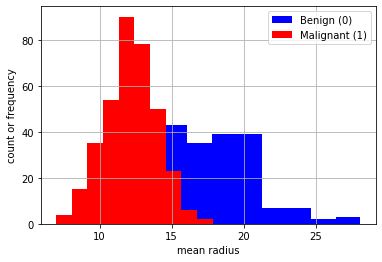

In [ ]:
plt.hist(df2[df2['malignant']==0]['mean radius'], color='b') #plotting the mean radius for the benign instances; color code 'b' = 'blue'
plt.hist(df2[df2['malignant']==1]['mean radius'], color='r') #plotting the mean radius for the malignant instances; color code 'r' = 'red'
plt.grid(True) #adding a grid on the plot
plt.xlabel('mean radius') #adding a label on the x-axis
plt.ylabel('count or frequency') #adding a label on the y-axis
plt.legend(['Benign (0)', 'Malignant (1)']) #adding a legend to the plot
plt.show() #displaying plot

> Rule:
```
if 'mean radius' > 15: 
  then y = 'benign'
else:
  y = 'malignant'
```

> Decision rule:

\begin{equation}
h(\textbf{x}) \mathop{\lessgtr}_{y=0}^{y=1} \tau
\end{equation}

> Extra features might help with the decision rule

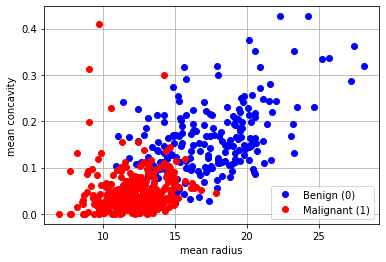

In [ ]:
plt.plot(df2[df2['malignant']==0]['mean radius'], df2[df2['malignant']==0]['mean concavity'], 'bo') 
#plotting the mean radius and mean texture for the benign instances; color code 'b': 'blue'; marker code 'o': circular points
plt.plot(df2[df2['malignant']==1]['mean radius'], df2[df2['malignant']==1]['mean concavity'], 'ro') 
#plotting the mean radius and mean texture for the malignant instances; color code 'r': 'red'; marker code 'o': circular points
plt.grid(True) #adding a grid on the plot
plt.xlabel('mean radius') #adding a label on the x-axis
plt.ylabel('mean concavity') #adding a label on the y-axis
plt.legend(['Benign (0)', 'Malignant (1)']) #adding a legend to the plot
plt.show() #displaying plot

> Decision boundary, aka hyperplane
- E.g., defined by boundary passing through: `mean radius = 15, mean concavity = 0.1`

> Rule:
```
if 'mean radius' > 15 or mean concavity > 0.1: 
  then y = 'benign'
else:
  y = 'malignant'
```

#### Generalisation: How do we know we have the correct rule?

- Mapping 4:

\begin{align}
&\textbf{x}:\quad -1 \quad 0 \quad +1 \quad +2 \quad +3\\
&y:\quad +1 \quad 0 \quad +1
\end{align}

- Rule?

---

- Mapping 5:
\begin{align}
&\textbf{x}:\quad -1 \quad 0 \quad +1 \quad +2 \quad +3\\
&y:\quad +1 \quad 0 \quad +1 \quad +2
\end{align}

- Rule?


> Training - validation split
- We split our data into two (or three):
  - We train the model on one set (training set)
  - We validate/test the model on the other sets (validation/test sets)

#### Generalisation

> There is some true function $f: \mathcal{X} ⟼ \mathcal{y}$

> Come up with a hypothesis function $h$ from the training set
- where $h \in \mathcal{H}$, the set of all hypothesis functions

> On the validation set:
\begin{equation}
h(\textbf{x}_{val}) \approx f(\textbf{x}_{val})
\end{equation}

> Probably Approximately Correct (PAC)
\begin{equation}
P(| h(\textbf{x}_{val}) - f(\textbf{x}_{val}) | < \epsilon) > p
\end{equation}

## Bayes Classifier

In [ ]:
df2.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,malignant
204,12.47,18.60,81.09,481.9,0.09965,0.1058,0.08005,0.03821,0.1925,0.06373,0.3961,1.0440,2.497,30.29,0.006953,0.01911,0.02701,0.01037,0.01782,0.003586,14.97,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.10150,0.3014,0.08750,1
70,18.94,21.31,123.60,1130.0,0.09009,0.1029,0.10800,0.07951,0.1582,0.05461,0.7888,0.7975,5.486,96.05,0.004444,0.01652,0.02269,0.01370,0.01386,0.001698,24.86,26.58,165.90,1866.0,0.1193,0.2336,0.2687,0.17890,0.2551,0.06589,0
131,15.46,19.48,101.70,748.9,0.10920,0.1223,0.14660,0.08087,0.1931,0.05796,0.4743,0.7859,3.094,48.31,0.006240,0.01484,0.02813,0.01093,0.01397,0.002461,19.26,26.00,124.90,1156.0,0.1546,0.2394,0.3791,0.15140,0.2837,0.08019,0
431,12.40,17.68,81.47,467.8,0.10540,0.1316,0.07741,0.02799,0.1811,0.07102,0.1767,1.4600,2.204,15.43,0.010000,0.03295,0.04861,0.01167,0.02187,0.006005,12.88,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359,1
540,11.54,14.44,74.65,402.9,0.09984,0.1120,0.06737,0.02594,0.1818,0.06782,0.2784,1.7680,1.628,20.86,0.012150,0.04112,0.05553,0.01494,0.01840,0.005512,12.26,19.68,78.78,457.8,0.1345,0.2118,0.1797,0.06918,0.2329,0.08134,1


> Task: predict whether or not a tumour is `malignant`
- Classification (categorical output)

- Target $y \in \{0, 1\}$
- Feature vector $\textbf{x}$

In [ ]:
class_names_df2[0], class_names_df2[1]

('benign', 'malignant')

> $p(y=1| \textbf{x})$ vs $p(y=0| \textbf{x})$

> Notation:

\begin{equation}
\max_k p(y=k | \textbf{x}), \forall k \in\{0,1\}
\end{equation}

> Posterior probability: $p(y=k | \textbf{x})$
- *Maximum a posteriori* (MAP) decision rule

> Suppose we had only one feature:
- $\textbf{x} = x$ (`mean radius`)
- $p(y=1| x=12.47)$ vs $p(y=0| x=12.47)$

### Bayes theorem

\begin{equation}
p(A|B) = \frac{p(B|A)p(A)}{p(B)} = \frac{p(B|A)p(A)}{\sum_A p(B|A)p(A)}
\end{equation}

It follows that:

\begin{equation}
p(y=0|x) = \frac{p(x|y=0)p(y=0)}{p(x)}
\end{equation}

Similarly,
\begin{equation}
p(y=1|x) = \frac{p(x|y=1)p(y=1)}{p(x)}
\end{equation}

> Likelihood:
- $p(x| y=0)$
- $p(x| y=1)$

> Prior:
- $p(y=0)$
- $p(y=1)$

> Evidence:
- $x$

> Who cares about $p(x)$?

> Rather than asking: 
- $p(y=1 | x= 12.47)$
- $p(y=0 | x= 12.47)$

> we have instead:
- $p(x=12.47 | y=1)$
- $p(x=12.47 | y=0)$
- Consideration for the priors

> Assumption: Gaussian (or normal) distribution
- Normal distributions are normal (https://aidanlyon.com/normal_distributions.pdf)
- A consequence of the central limit theorem (CLT)

> Demonstration of the CLT

In [ ]:
import numpy as np

In [ ]:
# get random numbers

population = np.random.uniform(size=100)
#population = [0.2, 7.9, 4, 18, 6000, 0.14, -17, 0, 16, 69, 419, -0.5, 85, -11, 0.125, 14]
population

array([0.62596089, 0.513348  , 0.70856169, 0.82397926, 0.28200715,
       0.15827102, 0.5061127 , 0.47615838, 0.63080133, 0.81870926,
       0.00198225, 0.17629704, 0.33119377, 0.58574153, 0.08705523,
       0.46390955, 0.95948879, 0.3079219 , 0.8199789 , 0.74594679,
       0.89708528, 0.33958802, 0.66883502, 0.935478  , 0.81388239,
       0.07025574, 0.8026309 , 0.7457868 , 0.7420454 , 0.21083781,
       0.57024783, 0.11763193, 0.52252919, 0.44380019, 0.34089948,
       0.02873367, 0.32628001, 0.33805596, 0.87993638, 0.2660367 ,
       0.56612513, 0.65048603, 0.61692209, 0.35077552, 0.85507081,
       0.18500453, 0.21361331, 0.99964697, 0.41060996, 0.86169292,
       0.72148194, 0.25171971, 0.60666065, 0.82660647, 0.48469603,
       0.13847435, 0.91031097, 0.53251077, 0.89083947, 0.46698517,
       0.29315524, 0.09804239, 0.01250881, 0.32248092, 0.01228766,
       0.52495127, 0.90105035, 0.68628965, 0.72032499, 0.15940586,
       0.84468467, 0.8528543 , 0.85322218, 0.13622987, 0.53544

(array([ 8.,  8.,  8., 13., 10., 12., 11.,  8., 14.,  8.]),
 array([0.00198225, 0.10174872, 0.2015152 , 0.30128167, 0.40104814,
        0.50081461, 0.60058108, 0.70034756, 0.80011403, 0.8998805 ,
        0.99964697]),
 <a list of 10 Patch objects>)

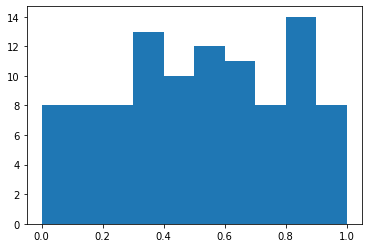

In [ ]:
plt.hist(population)

In [ ]:
sample_means = []
for i in range(10000):
    sample_means.append(np.random.choice(population, size=80).mean())

In [ ]:
import matplotlib.pyplot as plt

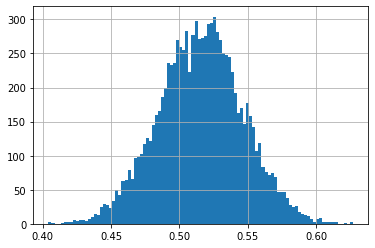

In [ ]:
plt.hist(sample_means, bins=100)
plt.grid(True)
plt.show()


> Probability density function (pdf):
\begin{equation}
f(x; \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{1}{2\sigma^2}(x-\mu)^2}
\end{equation}

> Likelihoods:

\begin{equation}
p(x|y=0) \sim N(\mu_0, \sigma_0^2)
\end{equation}

\begin{equation}
p(x|y=1) \sim N(\mu_1, \sigma_1^2)
\end{equation}

In [ ]:
df2.head()

NameError: ignored

In [ ]:
import seaborn as sns

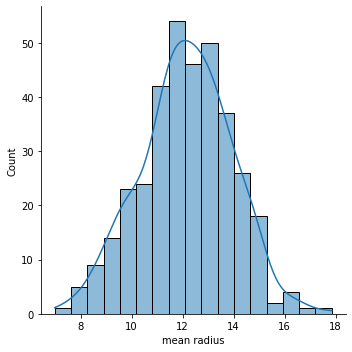

In [ ]:
sns.displot(df2[df2['malignant']==1]['mean radius'], kde=True)

> Troubleshooting: If the above cell fails to run, upgrade seaborn by running the following in a new code cell:

`!pip install seaborn==0.11.2`

- Then, delete or comment out the cell you create, and restart the runtime

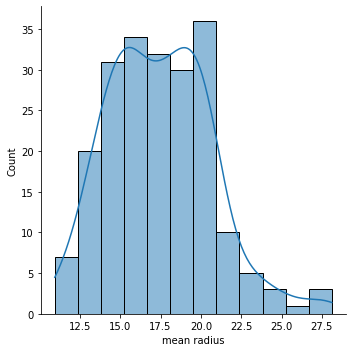

In [ ]:
sns.displot(df2[df2['malignant']==0]['mean radius'], kde=True)

In [ ]:
# Malignant
np.mean(df2[df2['malignant']==1]['mean radius']), np.var(df2[df2['malignant']==1]['mean radius'])

NameError: ignored

In [ ]:
# Benign
np.mean(df2[df2['malignant']==0]['mean radius']), np.var(df2[df2['malignant']==0]['mean radius'])

(17.462830188679252, 10.217008971164114)

- $p(x|y=1) \sim N(12.15, 3.16)$
- $p(x|y=0) \sim N(17.46, 10.22)$


> Now, we evaluate the pdf:
- $p(x=12.47 | y=1)$
- $p(x=12.47 | y=0)$


\begin{equation}
f(x; \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{1}{2\sigma^2}(x-\mu)^2}
\end{equation}

In [ ]:
# p(x=12.47| y= 1)

f1 = 1/np.sqrt(2*np.pi*3.16) * np.exp(-0.5*(12.47- 12.15)**2/3.16)
f1

0.220815652167996

In [ ]:
# p(x=12.47| y= 0)

f0 = 1/np.sqrt(2*np.pi*10.22) * np.exp(-0.5*(12.47- 17.46)**2/10.22)
f0

0.036908392064505836

\begin{equation}
p(y=0|x) = \frac{p(x|y=0)p(y=0)}{p(x)}
\end{equation}

\begin{equation}
p(y=1|x) = \frac{p(x|y=1)p(y=1)}{p(x)}
\end{equation}

> Prior probability
- $p(y=1)$
- $p(y=0)$

>> Equiprobable priors
- $p(y=1) = p(y=0) = 0.5$

>> Empirical distribution

In [ ]:
df2[df2['malignant'] == 1].shape[0]

357

In [ ]:
df2[df2['malignant'] == 0].shape[0]

212

In [ ]:
p1 = 357/(357+212)
p0 = 212/(357+212)
p1, p0

(0.6274165202108963, 0.37258347978910367)

- $p(y=1) = 0.63$
- $p(y=0) = 0.37$

\begin{equation}
p(y=1|x=12.47) = \frac{0.22\times 0.63}{p(x)}
\end{equation}

\begin{equation}
p(y=0|x=12.47) = \frac{0.04\times 0.37}{p(x)}
\end{equation}

> Decide $y = 1$

## Naive Bayes

> Now, we consider the entire set of features $\textbf{x}$:
>> Including these extra features can improve prediction accuracy!

In [ ]:
# feature vector x
df2.iloc[0,:-1]

mean radius                 12.470000
mean texture                18.600000
mean perimeter              81.090000
mean area                  481.900000
mean smoothness              0.099650
mean compactness             0.105800
mean concavity               0.080050
mean concave points          0.038210
mean symmetry                0.192500
mean fractal dimension       0.063730
radius error                 0.396100
texture error                1.044000
perimeter error              2.497000
area error                  30.290000
smoothness error             0.006953
compactness error            0.019110
concavity error              0.027010
concave points error         0.010370
symmetry error               0.017820
fractal dimension error      0.003586
worst radius                14.970000
worst texture               24.640000
worst perimeter             96.050000
worst area                 677.900000
worst smoothness             0.142600
worst compactness            0.237800
worst concav

\begin{equation}
p(y=0|\textbf{x}) = \frac{p(\textbf{x}|y=0)p(y=0)}{p(\textbf{x})}
\end{equation}

\begin{equation}
p(y=1|\textbf{x}) = \frac{p(\textbf{x}|y=1)p(y=1)}{p(\textbf{x})}
\end{equation}

\begin{equation}
\textbf{x} = [x_1, x_2, ..., x_d]
\end{equation}

> $x_1, x_2, ..., x_d$ are not necessarily independent!
- `mean radius` and `mean area`, for example, may be dependent

> Independence:
\begin{equation}
p(A,B) = p(A) p(B)
\end{equation}


> Assumption: Conditional independence:

\begin{equation}
p(\textbf{x}|y=0) = p(x_1|y=0)\times p(x_2|y=0)\times ...\times p(x_d|y=0) = \prod_{i=1}^d p(x_i|y=0)
\end{equation}

Similarly,
\begin{equation}
p(\textbf{x}|y=1) = p(x_1|y=1)\times p(x_2|y=1)\times ...\times p(x_d|y=1) = \prod_{i=1}^d p(x_i|y=1)
\end{equation}

\begin{equation}
p(y=0|\textbf{x}) = \frac{\prod_{i=1}^d p(x_i|y=0)p(y=0)}{p(\textbf{x})}
\end{equation}

\begin{equation}
p(y=1|\textbf{x}) = \frac{\prod_{i=1}^d p(x_i|y=1)p(y=1)}{p(\textbf{x})}
\end{equation}

\begin{equation}
p(x_i|y=0) \sim N(\mu_{0,i}, \sigma_{0,i}^2)
\end{equation}

\begin{equation}
p(x_i|y=1) \sim N(\mu_{1,i}, \sigma_{1,i}^2)
\end{equation}

### Naive Bayes Code

In [ ]:
df2.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,malignant
204,12.47,18.60,81.09,481.9,0.09965,0.1058,0.08005,0.03821,0.1925,0.06373,0.3961,1.0440,2.497,30.29,0.006953,0.01911,0.02701,0.01037,0.01782,0.003586,14.97,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.10150,0.3014,0.08750,1
70,18.94,21.31,123.60,1130.0,0.09009,0.1029,0.10800,0.07951,0.1582,0.05461,0.7888,0.7975,5.486,96.05,0.004444,0.01652,0.02269,0.01370,0.01386,0.001698,24.86,26.58,165.90,1866.0,0.1193,0.2336,0.2687,0.17890,0.2551,0.06589,0
131,15.46,19.48,101.70,748.9,0.10920,0.1223,0.14660,0.08087,0.1931,0.05796,0.4743,0.7859,3.094,48.31,0.006240,0.01484,0.02813,0.01093,0.01397,0.002461,19.26,26.00,124.90,1156.0,0.1546,0.2394,0.3791,0.15140,0.2837,0.08019,0
431,12.40,17.68,81.47,467.8,0.10540,0.1316,0.07741,0.02799,0.1811,0.07102,0.1767,1.4600,2.204,15.43,0.010000,0.03295,0.04861,0.01167,0.02187,0.006005,12.88,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359,1
540,11.54,14.44,74.65,402.9,0.09984,0.1120,0.06737,0.02594,0.1818,0.06782,0.2784,1.7680,1.628,20.86,0.012150,0.04112,0.05553,0.01494,0.01840,0.005512,12.26,19.68,78.78,457.8,0.1345,0.2118,0.1797,0.06918,0.2329,0.08134,1


> Step 1: Extract labels

In [ ]:
y = df2['malignant']
y

NameError: ignored

> Step 2: Extract features

In [ ]:
# We simply drop the label
X = df2.drop(columns='malignant')
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
204,12.470,18.60,81.09,481.9,0.09965,0.10580,0.08005,0.03821,0.1925,0.06373,0.3961,1.0440,2.4970,30.29,0.006953,0.019110,0.027010,0.010370,0.01782,0.003586,14.970,24.64,96.05,677.9,0.14260,0.23780,0.26710,0.10150,0.3014,0.08750
70,18.940,21.31,123.60,1130.0,0.09009,0.10290,0.10800,0.07951,0.1582,0.05461,0.7888,0.7975,5.4860,96.05,0.004444,0.016520,0.022690,0.013700,0.01386,0.001698,24.860,26.58,165.90,1866.0,0.11930,0.23360,0.26870,0.17890,0.2551,0.06589
131,15.460,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,0.1931,0.05796,0.4743,0.7859,3.0940,48.31,0.006240,0.014840,0.028130,0.010930,0.01397,0.002461,19.260,26.00,124.90,1156.0,0.15460,0.23940,0.37910,0.15140,0.2837,0.08019
431,12.400,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.02799,0.1811,0.07102,0.1767,1.4600,2.2040,15.43,0.010000,0.032950,0.048610,0.011670,0.02187,0.006005,12.880,22.91,89.61,515.8,0.14500,0.26290,0.24030,0.07370,0.2556,0.09359
540,11.540,14.44,74.65,402.9,0.09984,0.11200,0.06737,0.02594,0.1818,0.06782,0.2784,1.7680,1.6280,20.86,0.012150,0.041120,0.055530,0.014940,0.01840,0.005512,12.260,19.68,78.78,457.8,0.13450,0.21180,0.17970,0.06918,0.2329,0.08134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,0.5262,0.8522,3.1680,25.44,0.017210,0.093680,0.056710,0.017660,0.02541,0.021930,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840
106,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,0.3060,1.6570,2.1550,20.62,0.008540,0.023100,0.029450,0.013980,0.01565,0.003840,13.140,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
270,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,0.1302,0.7198,0.8439,10.77,0.003492,0.003710,0.004826,0.003608,0.01536,0.001381,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
435,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.06544,0.2208,0.9533,1.6020,18.85,0.005314,0.017910,0.021850,0.009567,0.01223,0.002846,17.040,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550


> Step 3: We split the data into training and test sets
- Here, we're splitting to a ratio of $80: 20$

In [ ]:
# Train - test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [ ]:
455/569, 114/569

(0.7996485061511424, 0.20035149384885764)

In [ ]:
d = X_train.shape[1]
d

30

> Step 4: In the training set `X_train`, we want to separate Class 1 (malignant) and Class 0 (benign), so that we can find the mean and variance of their features.

\begin{equation}
p(x_i|y=0) \sim N(\mu_{0,i}, \sigma_{0,i}^2)
\end{equation}

\begin{equation}
p(x_i|y=1) \sim N(\mu_{1,i}, \sigma_{1,i}^2)
\end{equation}

\begin{equation}
p(y=0|\textbf{x}) = \frac{\prod_{i=1}^d p(x_i|y=0)p(y=0)}{p(\textbf{x})}
\end{equation}

\begin{equation}
p(y=1|\textbf{x}) = \frac{\prod_{i=1}^d p(x_i|y=1)p(y=1)}{p(\textbf{x})}
\end{equation}

In [ ]:
X_train_1 = X_train[y_train == 1]

X_train_0 = X_train[y_train == 0]

In [ ]:
# Gives the means of all the features for class 1 (malignant) in the training set
mu_1 = np.mean(X_train_1, axis=0)
mu_1

mean radius                 12.129789
mean texture                17.993080
mean perimeter              77.981869
mean area                  461.155017
mean smoothness              0.092749
mean compactness             0.080785
mean concavity               0.046435
mean concave points          0.025961
mean symmetry                0.174608
mean fractal dimension       0.063018
radius error                 0.287942
texture error                1.250289
perimeter error              2.020202
area error                  21.397239
smoothness error             0.007325
compactness error            0.021562
concavity error              0.026268
concave points error         0.009920
symmetry error               0.020910
fractal dimension error      0.003650
worst radius                13.350761
worst texture               23.586125
worst perimeter             86.774810
worst area                 556.110381
worst smoothness             0.125072
worst compactness            0.182172
worst concav

In [ ]:
# Gives the variances of all the features for class 1 (malignant) in the training set
var_1 = np.var(X_train_1, axis=0)
var_1

mean radius                    3.099403
mean texture                  15.899684
mean perimeter               137.462447
mean area                  17313.814724
mean smoothness                0.000173
mean compactness               0.001144
mean concavity                 0.002025
mean concave points            0.000266
mean symmetry                  0.000596
mean fractal dimension         0.000042
radius error                   0.013170
texture error                  0.381492
perimeter error                0.622575
area error                    81.125242
smoothness error               0.000010
compactness error              0.000266
concavity error                0.001200
concave points error           0.000034
symmetry error                 0.000051
fractal dimension error        0.000009
worst radius                   3.776127
worst texture                 30.456546
worst perimeter              176.549414
worst area                 25243.416570
worst smoothness               0.000392


In [ ]:
mu_0 = np.mean(X_train_0, axis=0)
var_0 = np.var(X_train_0, axis=0)
mu_0.shape, var_0.shape

((30,), (30,))

> Step 5: We need to evaluate the prior probabilities

In [ ]:
p_1 = len(y_train[y_train == 1])/len(y_train)
p_1

0.6351648351648351

In [ ]:
p_0 = len(y_train[y_train == 0])/len(y_train)
p_0

0.3648351648351648

> Training is complete!

> Step 6: Testing
- To test the Naive Bayes model, we need to evaluate the following for each sample $\textbf{x}$ in the test set:

\begin{equation}
p(y=0|\textbf{x}) = \frac{\prod_{i=1}^d p(x_i|y=0)p(y=0)}{p(\textbf{x})}
\end{equation}

\begin{equation}
p(y=1|\textbf{x}) = \frac{\prod_{i=1}^d p(x_i|y=1)p(y=1)}{p(\textbf{x})}
\end{equation}

- We define a function to help us with the evaluation

In [ ]:
def pdf(x, y):
    """
    x: input (d-dimensional) vector of features from the test set
    y: input hypothesis: y=0 (benign), y=1 (malignant)
    
    joint_prob: the joint pdf of x under the hypothesis that y=0, or y=1
    """
    probs = []
    for j in range(d):
        if y == 1:
            prob = 1/np.sqrt(2*np.pi*var_1[j]) * np.exp(-0.5*(x[j]- mu_1[j])**2/var_1[j])
        elif y == 0:
            prob = 1/np.sqrt(2*np.pi*var_0[j]) * np.exp(-0.5*(x[j]- mu_0[j])**2/var_0[j])
        probs.append(prob)
    joint_prob = np.prod(probs)
    
    return joint_prob

In [ ]:
X_test.shape[0]

114

In [ ]:
y_predicted = []

for i in range(X_test.shape[0]):
    x_i = X_test.iloc[i,:]
    
    # Assuming y = 1
    joint_prob_1 = pdf(x_i, y=1)
    posterior_prob_1 = joint_prob_1 * p_1
    
    # Assuming y = 0
    joint_prob_0 = pdf(x_i, y=0)
    posterior_prob_0 = joint_prob_0 * p_0
    
    if posterior_prob_1 > posterior_prob_0:
        predicted = 1
    else:
        predicted = 0
        
    y_predicted.append(predicted)

> Step 7: We now compute the accuracy of our predictions on the test set `y_test`

In [ ]:
diff = y_predicted - y_test # y_test is the true labels from the holdout or test set

len(diff[diff==0])/len(y_test)

0.9035087719298246

> ***90.35% accuracy!***

## Quadratic Discriminant Analysis (QDA)

> We eliminate the naive independence assumption in Naive Bayes

\begin{equation}
p(y=0|\textbf{x}) = \frac{p(\textbf{x}|y=0)p(y=0)}{p(\textbf{x})}
\end{equation}

\begin{equation}
p(y=1|\textbf{x}) = \frac{p(\textbf{x}|y=1)p(y=1)}{p(\textbf{x})}
\end{equation}

> We can take ratios as follows:

\begin{equation}
\frac{p(y=0|\textbf{x})}{p(y=1|\textbf{x})} \mathop{\lessgtr}_{y=0}^{y=1} 1
\end{equation}

> MAP rule:
\begin{equation}
\frac{p(\textbf{x}|y=0)p(y=0)}{p(\textbf{x}|y=1)p(y=1)} \mathop{\lessgtr}_{y=0}^{y=1} 1
\end{equation}

which simplifies to:

\begin{equation}
\frac{p(\textbf{x}|y=0)}{p(\textbf{x}|y=1)} \mathop{\lessgtr}_{y=0}^{y=1} \frac{p(y=1)}{p(y=0)}
\end{equation}

> Define likelihood ratio $\lambda$
\begin{equation}
\lambda = \frac{p(\textbf{x}|y=0)}{p(\textbf{x}|y=1)}
\end{equation}

> Define $\tau$
\begin{equation}
\tau = \frac{p(y=1)}{p(y=0)}
\end{equation}

Therefore, decision rule is:
\begin{equation}
\lambda \mathop{\lessgtr}_{y=0}^{y=1} \tau
\end{equation}



> We still assume a Gaussian distribution
- ... except this time, a **multivariate Gaussian** distribution
- this ensures that the features in $\textbf{x}$ are jointly distributed with a covariance structure

### Multivariate Gaussian distribution

> Probability density function (pdf):
    
\begin{equation}
f(\textbf{x}; \textbf{m}, \textbf{K}) = \frac{1}{\sqrt{(2\pi)^d\det{(\textbf{K})}}}e^{-\frac{1}{2}(\textbf{x}-\textbf{m})^\top \textbf{K}^{-1} (\textbf{x}-\textbf{m})}
\end{equation}

where
$\textbf{m}$ is the mean of the feature vector $\textbf{x}$, and
$\textbf{K}$ is the covariance matrix

\begin{equation}
p(\textbf{x}|y=0) \sim N(\textbf{m}_{0}, \textbf{K}_0)
\end{equation}

\begin{equation}
p(\textbf{x}|y=1) \sim N(\textbf{m}_{1}, \textbf{K}_1)
\end{equation}

> Therefore,

\begin{equation}
\frac{p(\textbf{x}|y=0)}{p(\textbf{x}|y=1)} \mathop{\lessgtr}_{y=0}^{y=1} \frac{p(y=1)}{p(y=0)}
\end{equation}

> becomes:

\begin{equation}
\frac{\sqrt{\det{(\textbf{K}_1)}} e^{-\frac{1}{2}(\textbf{x}-\textbf{m}_0)^\top \textbf{K}_0^{-1} (\textbf{x}-\textbf{m}_0)}}{\sqrt{\det{(\textbf{K}_0)}}e^{-\frac{1}{2}(\textbf{x}-\textbf{m}_1)^\top \textbf{K}_1^{-1} (\textbf{x}-\textbf{m}_1)}} \mathop{\lessgtr}_{y=0}^{y=1} \frac{p(y=1)}{p(y=0)}
\end{equation}

> We can then simplify to:

\begin{equation}
e^{\frac{1}{2}\big[(\textbf{x}-\textbf{m}_1)^\top \textbf{K}_1^{-1} (\textbf{x}-\textbf{m}_1) - (\textbf{x}-\textbf{m}_0)^\top \textbf{K}_0^{-1} (\textbf{x}-\textbf{m}_0)\big]} \mathop{\lessgtr}_{y=0}^{y=1} \sqrt{\frac{\det{(\textbf{K}_0)}}{\det{(\textbf{K}_1)}}} \frac{p(y=1)}{p(y=0)}
\end{equation}

> We can then take logs:

\begin{equation}
\frac{1}{2}\bigg[(\textbf{x}-\textbf{m}_1)^\top \textbf{K}_1^{-1} (\textbf{x}-\textbf{m}_1) - (\textbf{x}-\textbf{m}_0)^\top \textbf{K}_0^{-1} (\textbf{x}-\textbf{m}_0)\bigg] \mathop{\lessgtr}_{y=0}^{y=1} \frac{1}{2}\log{\frac{\det{(\textbf{K}_0)}}{\det{(\textbf{K}_1)}}} + \log{\frac{p(y=1)}{p(y=0)}}
\end{equation}

> Multiply through by 2 and simplify:

\begin{equation}
(\textbf{x}-\textbf{m}_1)^\top \textbf{K}_1^{-1} (\textbf{x}-\textbf{m}_1) - (\textbf{x}-\textbf{m}_0)^\top \textbf{K}_0^{-1} (\textbf{x}-\textbf{m}_0) \mathop{\lessgtr}_{y=0}^{y=1} \log{\frac{\det{(\textbf{K}_0)}}{\det{(\textbf{K}_1)}}} + 2\log{\frac{p(y=1)}{p(y=0)}}
\end{equation}

> We obtain:
\begin{equation}
(\textbf{x}-\textbf{m}_1)^\top \textbf{K}_1^{-1} (\textbf{x}-\textbf{m}_1) - (\textbf{x}-\textbf{m}_0)^\top \textbf{K}_0^{-1} (\textbf{x}-\textbf{m}_0) \mathop{\lessgtr}_{y=0}^{y=1} \log{\frac{\tau^2 \det{(\textbf{K}_0)}}{\det{(\textbf{K}_1)}}}
\end{equation}

> where
\begin{equation}
\tau = \frac{p(y=1)}{p(y=0)}
\end{equation}

> In standard form:

\begin{equation}
\textbf{x}^\top \textbf{A} \textbf{x} + \textbf{b}^\top\textbf{x} + c \mathop{\lessgtr}_{y=0}^{y=1} 0
\end{equation}

> where:

\begin{align}
& \textbf{A} = (\textbf{K}_1^{-1} - \textbf{K}_0^{-1}) \\
& \textbf{b} = -2(\textbf{K}_1^{-1}\textbf{m}_1 - \textbf{K}_0^{-1}\textbf{m}_0) \\
& c = \textbf{m}_1^\top\textbf{K}_1^{-1}\textbf{m}_1 - \textbf{m}_0^\top\textbf{K}_0^{-1}\textbf{m}_0 - \log{\frac{\tau^2 \det{(\textbf{K}_0)}}{\det{(\textbf{K}_1)}}}
\end{align}

> A quadratic function in terms of $\textbf{x}$!

### QDA code

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

> Step 1: In the training set `X_train`, we want to separate class 1 (malignant) from class 0 (benign)

In [ ]:
X_train_1 = X_train[y_train == 1]

X_train_0 = X_train[y_train == 0]

> Step 2: Compute $\textbf{A}, \textbf{b}$ and $c$ from the training set
- To compute these, we need to compute 5 things:
 - $\textbf{m}_1, \textbf{m}_0, \textbf{K}_1, \textbf{K}_0, \tau$

In [ ]:
# Gives the means of all the features for class 1 (malignant) in the training set
m_1 = np.mean(X_train_1, axis=0)

# Gives the means of all the features for class 0 (malignant) in the training set
m_0 = np.mean(X_train_0, axis=0)

# Gives the covariance of all the features for class 1 (malignant) in the training set
K_1 = np.cov(X_train_1, rowvar=False)

# Gives the covariance of all the features for class 0 (benign) in the training set
K_0 = np.cov(X_train_0, rowvar=False)

K_1.shape, K_0.shape

((30, 30), (30, 30))

In [ ]:
A = (np.linalg.pinv(K_1) - np.linalg.pinv(K_0))
A.shape

(30, 30)

In [ ]:
b = -2*(np.linalg.pinv(K_1)@m_1 - np.linalg.pinv(K_0)@m_0)
b.shape

(30,)

In [ ]:
p_1 = len(y_train[y_train == 1])/len(y_train)
p_0 = len(y_train[y_train == 0])/len(y_train)
tau = p_1/p_0
c = m_1.T@np.linalg.pinv(K_1)@m_1 - m_0.T@np.linalg.pinv(K_0)@m_0 - np.log(tau**2 * np.linalg.det(K_0)/ np.linalg.det(K_1))
c

-141.00688008780392

> Step 3: we need to evaluate the following for each sample in the test set `X_test`:

\begin{equation}
\textbf{x}^\top \textbf{A} \textbf{x} + \textbf{b}^\top\textbf{x} + c \mathop{\lessgtr}_{y=0}^{y=1} 0
\end{equation}

In [ ]:
y_predicted_qda = []

for i in range(X_test.shape[0]):
    x_i = X_test.iloc[i,:]
    
    quad_func = x_i.T@A@x_i + b.T@x_i + c
    
    if quad_func > 0:
        predicted = 0
    else:
        predicted = 1
        
    y_predicted_qda.append(predicted)

> Step 4: We now compute the accuracy of our predictions on the test set `y_test`

In [ ]:
diff = y_predicted_qda - y_test # y_test is the true labels from the holdout or test set

len(diff[diff==0])/len(y_test)

0.9122807017543859

> ***91.22% accuracy!***

## Linear Discriminant Analysis

> Task: We want the following decision rule to be linear

\begin{equation}
\textbf{x}^\top \textbf{A} \textbf{x} + \textbf{b}^\top\textbf{x} + c \mathop{\lessgtr}_{y=0}^{y=1} 0
\end{equation}

> Why?
- Robust (even if the multivariate Gaussian assumption does not hold)
- Kernelisable (allows for learning arbitrary non-linear decision boundaries)
- Fast training and testing

### Homoscedasticity
- Assumption of equal covariance between classes

$\textbf{K}_1 = \textbf{K}_0 = \textbf{K}$

Some common covariance matrix $\textbf{K}$

\begin{equation}
\textbf{K} = \frac{1}{n_1 + n_0}(n_1 \textbf{K}_1 + n_0 \textbf{K}_0)
\end{equation}

where

$n_1$ is the number of samples in class 1 in the training set `X_train`

$n_0$ is the number of samples in class 0 in the training set `X_train`

\begin{align}
& \textbf{A} = (\textbf{K}_1^{-1} - \textbf{K}_0^{-1}) \\
& \textbf{b} = -2(\textbf{K}_1^{-1}\textbf{m}_1 - \textbf{K}_0^{-1}\textbf{m}_0) \\
& c = \textbf{m}_1^\top\textbf{K}_1^{-1}\textbf{m}_1 - \textbf{m}_0^\top\textbf{K}_0^{-1}\textbf{m}_0 - \log{\frac{\tau^2 \det{(\textbf{K}_0)}}{\det{(\textbf{K}_1)}}}
\end{align}

> Results of homosecedasticity assumption:

\begin{align}
& \textbf{A} = 0 \\
& \textbf{b} = -2\textbf{K}^{-1}(\textbf{m}_1 - \textbf{m}_0) \\
& c = \textbf{m}_1^\top\textbf{K}^{-1}\textbf{m}_1 - \textbf{m}_0^\top\textbf{K}^{-1}\textbf{m}_0 - 2\log{\tau}
\end{align}

> Decision rule becomes linear:

\begin{equation}
\textbf{b}^\top\textbf{x} + c \mathop{\lessgtr}_{y=0}^{y=1} 0
\end{equation}

### LDA code

> Step 1: In the training set `X_train`, we want to separate class 1 (malignant) from class 0 (benign)

In [ ]:
X_train_1 = X_train[y_train == 1]

X_train_0 = X_train[y_train == 0]

> Step 2: Compute $\textbf{b}$ and $c$ from the training set
- To compute these, we need to compute 5 things:
 - $\textbf{m}_1, \textbf{m}_0, \textbf{K}_1, \textbf{K}_0, \tau$

In [ ]:
# Gives the means of all the features for class 1 (malignant) in the training set
m_1 = np.mean(X_train_1, axis=0)

# Gives the means of all the features for class 0 (malignant) in the training set
m_0 = np.mean(X_train_0, axis=0)

# Gives the covariance of all the features for class 1 (malignant) in the training set
K_1 = np.cov(X_train_1, rowvar=False)

# Gives the covariance of all the features for class 0 (benign) in the training set
K_0 = np.cov(X_train_0, rowvar=False)

K_1.shape, K_0.shape

((30, 30), (30, 30))

- To compute $\textbf{b}$, we need to compute $\textbf{K}$

In [ ]:
n_1 = X_train_1.shape[0]
n_1

289

In [ ]:
n_0 = X_train_0.shape[0]
n_0

166

In [ ]:
K = (n_1 * K_1 + n_0 * K_0)/(n_1 + n_0)
K.shape

(30, 30)

In [ ]:
b = -2*(np.linalg.pinv(K)@m_1 - np.linalg.pinv(K)@m_0)
b.shape

(30,)

In [ ]:
p_1 = len(y_train[y_train == 1])/len(y_train)
p_0 = len(y_train[y_train == 0])/len(y_train)
tau = p_1/p_0

c = m_1.T@np.linalg.pinv(K)@m_1 - m_0.T@np.linalg.pinv(K)@m_0 - 2*np.log(tau)
c

-95.59010112046677

> Step 3: we need to evaluate the following for each element in the test set:

\begin{equation}
\textbf{b}^\top\textbf{x} + c \mathop{\lessgtr}_{y=0}^{y=1} 0
\end{equation}

In [ ]:
y_predicted_lda = []

for i in range(X_test.shape[0]):
    x_i = X_test.iloc[i,:]
    
    linear_func = b.T@x_i + c
    
    if linear_func > 0:
        predicted = 0
    else:
        predicted = 1
        
    y_predicted_lda.append(predicted)

> Step 4: We now compute the accuracy of our predictions on the test set `y_test`

In [ ]:
diff = y_predicted_lda - y_test # y_test is the true labels from the holdout or test set

len(diff[diff==0])/len(y_test)

0.9385964912280702

> ***93.86% accuracy!***

## Maximum Likelihood Estimation

> Consider a set of independent and identically distributed (iid) observations from a (univariate) Gaussian distribution

- $x_1, x_2, ..., x_n$

> What is the maximum likelihood estimates of the distribution parameters?

$x_i\sim N(\mu, \sigma^2)$

> Maximum likelihood estimates:
- $\hat{\mu}$
- $\hat{\sigma}^2$

> Probability density function (pdf)

\begin{equation}
f(x; \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{1}{2\sigma^2}(x-\mu)^2}
\end{equation}

> Likelihood of the data $L$:

\begin{equation}
L = p(x_1, x_2, ..., x_n | \mu, \sigma^2)
\end{equation}

> Because samples are independent (iid):

\begin{equation}
L = \prod_{i=1}^n p(x_i | \mu, \sigma^2)
\end{equation}

> Substituting the Gaussian pdf:

\begin{equation}
L = \prod_{i=1}^n \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{1}{2\sigma^2}(x_i-\mu)^2}
\end{equation}

> We can simplify as:
    
\begin{equation}
L = \bigg(\frac{1}{\sqrt{2\pi\sigma^2}}\bigg)^n \prod_{i=1}^n e^{-\frac{1}{2\sigma^2}(x_i-\mu)^2}
\end{equation}

\begin{equation}
L = \bigg(\frac{1}{\sqrt{2\pi\sigma^2}}\bigg)^n e^{-\frac{1}{2\sigma^2} \sum_{i=1}^n (x_i-\mu)^2}
\end{equation}

> We can take logs:

\begin{equation}
\log L = n \log{\frac{1}{\sqrt{2\pi\sigma^2}}} -\frac{1}{2\sigma^2} \sum_{i=1}^n (x_i-\mu)^2
\end{equation}

### Maximum likelihood estimate of $\mu$:

> What value of $\mu$ maximises the log-likelihood?

> To maximise a function, a necessary condition is to differentiate and equate to zero:

\begin{equation}
\log L = n \log{\frac{1}{\sqrt{2\pi\sigma^2}}} -\frac{1}{2\sigma^2} \sum_{i=1}^n (x_i-\mu)^2
\end{equation}

\begin{equation}
\frac{\partial \log L}{\partial \mu} = \frac{1}{\sigma^2}\sum_{i=1}^n (x_i - \mu) = 0
\end{equation}

\begin{equation}
\sum_{i=1}^n (x_i - \mu) = 0
\end{equation}

\begin{equation}
\sum_{i=1}^n x_i = \sum_{i=1}^n \mu = n\mu
\end{equation}

\begin{equation}
\hat{\mu} = \frac{1}{n} \sum_{i=1}^n x_i
\end{equation}

### Maximum likelihood estimate of $\sigma^2$

> What value of $\sigma$ maximises the log-likelihood?

\begin{equation}
\log L = n \log{\frac{1}{\sqrt{2\pi\sigma^2}}} -\frac{1}{2\sigma^2} \sum_{i=1}^n (x_i-\mu)^2
\end{equation}

> This can be simplified as:

\begin{equation}
\log L = n\log{\frac{1}{\sqrt{2\pi}}} - n\log{\sigma} -\frac{\sigma^{-2}}{2} \sum_{i=1}^n (x_i-\mu)^2
\end{equation}

> To maximise a function, a necessary condition is to differentiate and equate to zero:

\begin{equation}
\frac{\partial \log L}{\partial \sigma} = -\frac{n}{\sigma} + \sigma^{-3} \sum_{i=1}^n (x_i - \mu)^2 = 0
\end{equation}

> We multiply through by $\sigma^3:$

\begin{equation}
-n\sigma^2 + \sum_{i=1}^n (x_i - \mu)^2 = 0
\end{equation}

\begin{equation}
\hat{\sigma}^2 = \frac{1}{n}\sum_{i=1}^n (x_i - \mu)^2
\end{equation}

** Biased estimate

## Logistic Regression

> Machine Learning

- Feature vector $\textbf{x}$
- Target label $y$

> $h: \mathcal{X} \longmapsto \mathcal{y}$

> Probably Approximately Correct (PAC)
\begin{equation}
P(| h(\textbf{x}_{test}) - f(\textbf{x}_{test}) | < \epsilon) > p
\end{equation}

> Classification (binary)

> $p(y=1|\textbf{x})$ vs $p(y=0|\textbf{x})$

> Now, we're going to assume $y$ is a random variable, following a Bernouilli distribution!

### Bernouilli trial

> Random event with two possible outcomes $y$, e.g., from a coin: $y \in \{0, 1\}$
- Heads (1)
- Tails (0)

> Fair coin

- $p(y = 1) = 0.5$
- $p(y = 0) = 0.5$

> Biased coin

- $p(y = 1) = q$
- $p(y = 0) = 1-q$

> Assumption: Independent Bernouilli trials

> For each $\textbf{x}_i$ in the training set `X_train`, there is an associated $q_i$, so that

- $p(y_i = 1| \textbf{x}_i) = q_i$
- $p(y_i = 0| \textbf{x}_i) = 1 - q_i$

> The value of $q_i$ depends on what features $\textbf{x}_i$ we're given

### Logistic function

> How do we get the probability $q_i$?

> First, consider a linear combination of the features

\begin{equation}
z_i = w_0 + w_1x_1 + w_2x_2 + ... + w_dx_d = \textbf{w}^\top\textbf{x}_i
\end{equation}

where:
\begin{equation}
\textbf{w} = [w_0, w_1, w_2, ..., w_d]
\end{equation}

and 
\begin{equation}
\textbf{x}_i = [1, x_1, x_2, ..., x_d]
\end{equation}

> This includes a constant term $w_0$!


> We now pass $z_i$ through a logistic function:
\begin{equation}
q_i = \frac{1}{1+ e^{-z_i}}, \quad q_i \in [0, 1]
\end{equation}

In [ ]:
z = np.linspace(-10, 10, 100)
z

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72

In [ ]:
q = 1/(1 + np.exp(-z))
q

array([4.53978687e-05, 5.55606489e-05, 6.79983174e-05, 8.32200197e-05,
       1.01848815e-04, 1.24647146e-04, 1.52547986e-04, 1.86692945e-04,
       2.28478855e-04, 2.79614739e-04, 3.42191434e-04, 4.18766684e-04,
       5.12469082e-04, 6.27124987e-04, 7.67413430e-04, 9.39055039e-04,
       1.14904229e-03, 1.40591988e-03, 1.72012560e-03, 2.10440443e-03,
       2.57431039e-03, 3.14881358e-03, 3.85103236e-03, 4.70911357e-03,
       5.75728612e-03, 7.03711536e-03, 8.59898661e-03, 1.05038445e-02,
       1.28252101e-02, 1.56514861e-02, 1.90885420e-02, 2.32625358e-02,
       2.83228820e-02, 3.44451957e-02, 4.18339400e-02, 5.07243606e-02,
       6.13831074e-02, 7.41067363e-02, 8.92170603e-02, 1.07052146e-01,
       1.27951705e-01, 1.52235823e-01, 1.80176593e-01, 2.11963334e-01,
       2.47663801e-01, 2.87185901e-01, 3.30246430e-01, 3.76354517e-01,
       4.24816868e-01, 4.74768924e-01, 5.25231076e-01, 5.75183132e-01,
       6.23645483e-01, 6.69753570e-01, 7.12814099e-01, 7.52336199e-01,
      

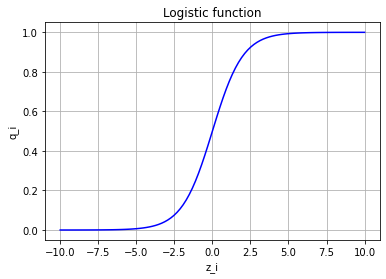

In [ ]:
plt.plot(z, q, 'b')
plt.grid(True)
plt.xlabel('z_i')
plt.ylabel('q_i')
plt.title('Logistic function')
plt.show()

> We have parameterised $q_i$ by some vector of weights $\textbf{w}$, given $\textbf{x}_i$:

\begin{equation}
q_i = \frac{1}{1+ e^{-\textbf{w}^\top\textbf{x}_i}}, \quad q_i \in [0, 1]
\end{equation}

> If we knew $\textbf{w}$, we'd know $q_i$, and since $q_i$ is a probability, we can make predictions as follows:

\begin{equation}
y_i = 
\begin{cases}
1, \quad q_i \geq 0.5\\
0, \quad q_i < 0.5
\end{cases}
\end{equation}

> Using $\textbf{x}_i, y_i$ from the training set `X_train`, our task is to find the optimal $\textbf{w}$ that maximises the likelihood.

### Maximum likelihood estimation

> Likelihood $L$:

\begin{equation}
L = \prod_{i=1}^n p(y_i | \textbf{x}_i, \textbf{w})
\end{equation}

> Probability mass function (pmf) for the Bernouilli distribution:

\begin{equation}
f(y_i; q_i) = 
\begin{cases}
q_i, \quad\quad y_i = 1\\
1 - q_i, \quad y_i = 0
\end{cases}
\end{equation}

> This can be rewritten as:

\begin{equation}
f(y_i; q_i) = q_i^{y_i} (1-q_i)^{1-y_i}
\end{equation}

> Likelihood $L$
- Given $\textbf{x}_i, \textbf{w}$ we know $q_i$

\begin{equation}
L = \prod_{i=1}^n p(y_i | \textbf{x}_i, \textbf{w}) = \prod_{i=1}^n q_i^{y_i} (1-q_i)^{1-y_i}
\end{equation}

> For computational reasons, we can take logs:

\begin{equation}
\log L  = \sum_{i=1}^n \log {\big[q_i^{y_i} (1-q_i)^{1-y_i}\big]}
\end{equation}

> This can be simplified as:

\begin{equation}
\log L  = \sum_{i=1}^n y_i \log {q_i} +  (1-y_i)\log{(1-q_i)}
\end{equation}

> Recall that:
    
\begin{equation}
q_i = \frac{1}{1+ e^{-\textbf{w}^\top\textbf{x}_i}}, \quad q_i \in [0, 1]
\end{equation}

> So, we want to maximise the log likelihood wrt $\textbf{w}$ which is given in $q_i$.

\begin{equation}
\max_{\textbf{w}} \sum_{i=1}^n y_i \log {q_i} +  (1-y_i)\log{(1-q_i)}
\end{equation}

> Maximising a function = minimising negative of the function

\begin{equation}
\min -\sum_{i=1}^n y_i \log {q_i} +  (1-y_i)\log{(1-q_i)}
\end{equation}

> If we divide by the number of training examples $n$, the minimisation problem doesn't change:

\begin{equation}
\min \frac{1}{n}\sum_{i=1}^n -y_i \log {q_i} - (1-y_i)\log{(1-q_i)}
\end{equation}

> We define $J$ as a loss function given as:

\begin{equation}
J = \frac{1}{n} \sum_{i=1}^n -y_i \log {q_i} - (1-y_i)\log{(1-q_i)} =  \frac{1}{n} \sum_{i=1}^n J_i
\end{equation}

> In information theory, we define entropy $E$ for a Bernouilli random trial as:

\begin{equation}
E(y) = -P(y=1)\log(P(y=1)) - P(y=0)\log(P(y=0))
\end{equation}

> This compares with each term in our loss function $J_i$:

> But there is a difference...

- Instead of:
    
\begin{equation}
-y_i \log (y_i) - (1-y_i) \log (1-y_i)
\end{equation}

- we have:
\begin{equation}
J_i = -y_i \log (q_i) - (1-y_i) \log (1-q_i)
\end{equation}

> Entropy between two probability distributions over the same sample space
- Hence $J_i$ is a *cross*-entropy!

> $J$ is termed the cross-entropy loss
- Standard loss function in many neural networks!



---


> Differentiate the cross entropy loss $J$ wrt $\textbf{w}$ and equate to $\textbf{0}$?

\begin{equation}
J = \frac{1}{n}\sum_{i=1}^n -y_i \log {q_i} - (1-y_i)\log{(1-q_i)} = \frac{1}{n}\sum_{i=1}^n J_i
\end{equation}

\begin{equation}
q_i = \frac{1}{1+ e^{-z_i}}, \quad q_i \in [0, 1]
\end{equation}

\begin{equation}
z_i = \textbf{w}^\top\textbf{x}_i
\end{equation}

> Chain rule:

\begin{equation}
\frac{\partial J}{\partial \textbf{w}^\top} = \frac{1}{n}\sum_{i=1}^n \frac{\partial J_i}{\partial q_i}\times \frac{\partial q_i}{\partial z_i} \times \frac{\partial z_i}{\partial \textbf{w}^\top}
\end{equation}

\begin{equation}
\frac{\partial J_i}{\partial q_i} = -\frac{y_i}{q_i} + \frac{1-y_i}{1-q_i} = \frac{q_i - y_i}{q_i(1-q_i)}
\end{equation}

\begin{equation}
q_i = \frac{1}{1+ e^{-z_i}} = (1+ e^{-z_i})^{-1}
\end{equation}

\begin{equation}
\frac{\partial q_i}{\partial z_i} = \frac{e^{-z_i}}{(1+e^{-z_i})^2}
\end{equation}

\begin{equation}
\frac{\partial q_i}{\partial z_i} = \frac{e^{-z_i}}{1+e^{-z_i}}\times\frac{1}{1+e^{-z_i}} = \frac{e^{-z_i}}{1+e^{-z_i}}q_i
\end{equation}

> Furthermore, notice that

\begin{equation}
\frac{e^{-z_i}}{1+e^{-z_i}} = 1 - q_i
\end{equation}

> Therefore,

\begin{equation}
\frac{\partial q_i}{\partial z_i} = q_i(1-q_i)
\end{equation}

> Finally, since:
    
\begin{equation}
z_i = \textbf{w}^\top\textbf{x}_i,
\end{equation}

\begin{equation}
\frac{\partial z_i}{\partial \textbf{w}^\top} = \textbf{x}_i
\end{equation}

\begin{equation}
\frac{\partial J}{\partial \textbf{w}^\top} = \frac{1}{n}\sum_{i=1}^n \frac{q_i - y_i}{q_i(1-q_i)} \times q_i(1-q_i) \times \textbf{x}_i
\end{equation}

> This can be simplified as:

\begin{equation}
\frac{\partial J}{\partial \textbf{w}^\top} = \frac{1}{n}\sum_{i=1}^n (q_i - y_i) \textbf{x}_i
\end{equation}

> We cannot easily solve for $\textbf{w}$ in closed-form, by equating to $\textbf{0}$

> ... instead, we take an iterative approach, starting from some arbitrary initial value:

### Gradient Descent

> To minimise a function, we take steps in the negative direction of the gradient:

\begin{equation}
\textbf{x}^{(t+1)} = \textbf{x}^{(t)} - \alpha \nabla_{\textbf{x}}(\textbf{x}^{(t)})
\end{equation}

> $\alpha$ is the learning rate

> $\nabla_{\textbf{x}}$ is the gradient of the function wrt $\textbf{x}$

> $t$ is some time index

> Example:
- Minimise $f(x) = (x-3)^2$

\begin{align}
& \frac{\partial f}{\partial x} = 2(x-3) = 0 \\
& x = 3
\end{align}

- Minimum value is $f=0$, and the minimum occurs at $x=3$

> Gradient:

\begin{equation}
\nabla_x = \frac{d f}{d x} = 2(x-3)
\end{equation}

\begin{equation}
x^{(t+1)} = x^{(t)} - \alpha \nabla_x(x^{(t)})
\end{equation}

> Starting from some arbitrary initial value $x^{(0)}$:

\begin{equation}
x^{(1)} = x^{(0)} - \alpha \nabla_x(x^{(0)})
\end{equation}

\begin{equation}
x^{(2)} = x^{(1)} - \alpha \nabla_x(x^{(1)})
\end{equation}

\begin{equation}
x^{(3)} = x^{(2)} - \alpha \nabla_x(x^{(2)})
\end{equation}

\begin{equation}
\vdots
\end{equation}

#### Gradient descent code

> $x^{(t)}$ = `x_current`

> $x^{(t+1)}$ = `x_next`

In [ ]:
alpha = 0.1 #learning rate

x_current = 17 #Initialisation to some random value

x_list = []
function_value_list = []

for r in range(100):
    
    function_value = (x_current-3)**2
    function_value_list.append(function_value)    
    x_list.append(x_current)
    
    # Update rule
    gradient = 2*(x_current-3)
    x_next = x_current - alpha*gradient
    
    #Update current x
    x_current = x_next
    
print(x_current, function_value)

3.0000000028518503 1.270789093588244e-17


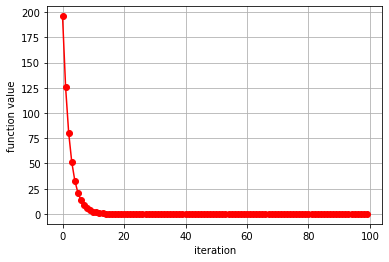

In [ ]:
plt.plot(function_value_list, 'ro-')
plt.grid(True)
plt.xlabel('iteration')
plt.ylabel('function value')
plt.show()

> The function $f(x) = (x-3)^2$ is convex.
- Therefore, starting from any random initial value would converge to the same final solution

> Logistic regression

- Cross entropy loss $J$:

\begin{equation}
\min J = \frac{1}{n}\sum_{i=1}^n -y_i \log {q_i} - (1-y_i)\log{(1-q_i)}
\end{equation}

\begin{equation}
\textbf{w}^{(t+1)} = \textbf{w}^{(t)} - \alpha \nabla_{\textbf{w}}(\textbf{w}^{(t)})
\end{equation}

\begin{equation}
\nabla_{\textbf{w}} = \frac{\partial J}{\partial \textbf{w}^\top} = \frac{1}{n}\sum_{i=1}^n (q_i - y_i) \textbf{x}_i
\end{equation}

### Logistic regression code

> Step 1: Normalise the training set `X_train` by subtracting the mean and dividing by the standard deviation:

- Normalisation tends to speed up gradient descent, can improve accuracy, and avoids certain computational issues 

In [ ]:
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
188,11.81,17.39,75.27,428.9,0.10070,0.05562,0.02353,0.01553,0.1718,0.05780,0.1859,1.9260,1.011,14.47,0.007831,0.008776,0.01556,0.006240,0.03139,0.001988,12.57,26.48,79.57,489.5,0.1356,0.1000,0.08803,0.04306,0.3200,0.06576
410,11.36,17.57,72.49,399.8,0.08858,0.05313,0.02783,0.02100,0.1601,0.05913,0.1916,1.5550,1.359,13.66,0.005391,0.009947,0.01163,0.005872,0.01341,0.001659,13.05,36.32,85.07,521.3,0.1453,0.1622,0.18110,0.08698,0.2973,0.07745
462,14.40,26.99,92.25,646.1,0.06995,0.05223,0.03476,0.01737,0.1707,0.05433,0.2315,0.9112,1.727,20.52,0.005356,0.016790,0.01971,0.006370,0.01414,0.001892,15.40,31.98,100.40,734.6,0.1017,0.1460,0.14720,0.05563,0.2345,0.06464
263,15.61,19.38,100.00,758.6,0.07840,0.05616,0.04209,0.02847,0.1547,0.05443,0.2298,0.9988,1.534,22.18,0.002826,0.009105,0.01311,0.005174,0.01013,0.001345,17.91,31.67,115.90,988.6,0.1084,0.1807,0.22600,0.08568,0.2683,0.06829
79,12.86,18.00,83.19,506.3,0.09934,0.09546,0.03889,0.02315,0.1718,0.05997,0.2655,1.0950,1.778,20.35,0.005293,0.016610,0.02071,0.008179,0.01748,0.002848,14.24,24.82,91.88,622.1,0.1289,0.2141,0.17310,0.07926,0.2779,0.07918


\begin{equation}
x_{norm} = \frac{x - \text{mean}(x)}{\text{std}(x)}
\end{equation}

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)
X_train_norm

array([[-0.65238694, -0.44142417, -0.68260368, ..., -1.07418807,
         0.47291357, -1.05270857],
       [-0.78110421, -0.39924004, -0.79814053, ..., -0.40446421,
         0.10694113, -0.36818868],
       [ 0.0884525 ,  1.80839586,  0.02308545, ..., -0.88251164,
        -0.90552889, -1.11829132],
       ...,
       [-0.41211469, -0.25862629, -0.37422834, ...,  0.41469714,
         0.52127997,  1.14548448],
       [ 1.56155023,  2.22554999,  1.74159225, ...,  1.22897889,
        -0.14295195,  0.98152762],
       [ 1.13249264, -0.73202592,  1.18468799, ...,  1.47448331,
         1.36124315,  1.58465464]])

> Step 2: Introduce a column of ones for the constant term in the logistic regression network

- Recall that:

\begin{equation}
\textbf{x}_i = [1, x_1, x_2, ..., x_d]
\end{equation}

\begin{equation}
\textbf{w} = [w_0, w_1, w_2, ..., w_d]
\end{equation}

- so that:

\begin{equation}
z_i = \textbf{w}^\top\textbf{x}_i = w_0 + w_1x_1 + w_2x_2 + ... + w_dx_d
\end{equation}

In [ ]:
X_train_norm = np.hstack((np.ones([X_train.shape[0],1]), X_train_norm))
X_test_norm = np.hstack((np.ones([X_test.shape[0],1]), X_test_norm))
X_train_norm

array([[ 1.        , -0.65238694, -0.44142417, ..., -1.07418807,
         0.47291357, -1.05270857],
       [ 1.        , -0.78110421, -0.39924004, ..., -0.40446421,
         0.10694113, -0.36818868],
       [ 1.        ,  0.0884525 ,  1.80839586, ..., -0.88251164,
        -0.90552889, -1.11829132],
       ...,
       [ 1.        , -0.41211469, -0.25862629, ...,  0.41469714,
         0.52127997,  1.14548448],
       [ 1.        ,  1.56155023,  2.22554999, ...,  1.22897889,
        -0.14295195,  0.98152762],
       [ 1.        ,  1.13249264, -0.73202592, ...,  1.47448331,
         1.36124315,  1.58465464]])

> Step 3: On the normalised training set `X_train_norm`, find the optimal $\textbf{w}$ by gradient descent on the cross-entropy loss $J$

\begin{equation}
\textbf{w}^{(t+1)} = \textbf{w}^{(t)} - \alpha \nabla_{\textbf{w}}(\textbf{w}^{(t)})
\end{equation}

> $\textbf{w}^{(t)}$ = `w_current`

> $\textbf{w}^{(t+1)}$ = `w_next`

In [ ]:
alpha = 0.1 #learning rate

n = X_train_norm.shape[0]

w_current = np.ones([d+1,1])/(d+1) #Initialisation
#w_current = np.random.normal(size=(d+1,1))

function_value_list = []

for r in range(1000):
    
    epsilon = 0
    gradient = 0
    for i in range(n):
        x_i = X_train_norm[i,:].reshape(-1,1)
        y_i = y_train.iloc[i]
        z_i = (w_current.T@x_i)[0][0]
        q_i = 1/(1 + np.exp(-z_i))
        
        epsilon_i = -y_i*np.log(q_i) - (1-y_i)*np.log(1-q_i)
        epsilon = epsilon + epsilon_i
        
        gradient_i = (q_i - y_i)*x_i
        gradient = gradient + gradient_i
        
    gradient = gradient/n #average gradient
    epsilon = epsilon/n #average cross entropy loss
    
    function_value_list.append(epsilon)
    
    # Update rule
    w_next = w_current - alpha*gradient
    
    #Update current solution
    w_current = w_next.copy()


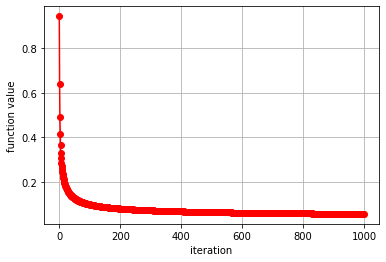

In [ ]:
plt.plot(function_value_list, 'ro-')
plt.grid(True)
plt.xlabel('iteration')
plt.ylabel('function value')
plt.show()

In [ ]:
w_current

array([[ 0.62288639],
       [-0.5030248 ],
       [-0.59619043],
       [-0.48689386],
       [-0.55526859],
       [-0.1585328 ],
       [ 0.10391224],
       [-0.59228705],
       [-0.73117124],
       [-0.14054694],
       [ 0.31517439],
       [-0.98231342],
       [ 0.06873686],
       [-0.74277646],
       [-0.7529556 ],
       [ 0.27971529],
       [ 0.59754358],
       [ 0.20518218],
       [-0.03642098],
       [ 0.17742197],
       [ 0.58092075],
       [-0.84051739],
       [-0.82561677],
       [-0.77439454],
       [-0.8235339 ],
       [-0.59245236],
       [-0.24470498],
       [-0.64460381],
       [-0.8343082 ],
       [-0.62062191],
       [-0.27621256]])

> Step 4: Once we have learned the optimal value `w_current`, we can test the model on `X_test_norm` by evaluating the following:

\begin{equation}
z_i = \textbf{w}_{current}^\top\textbf{x}_i
\end{equation}

\begin{equation}
q_i = \frac{1}{1+ e^{-z_i}}, \quad q_i \in [0, 1]
\end{equation}

\begin{equation}
y_i = 
\begin{cases}
1, \quad q_i \geq 0.5\\
0, \quad q_i < 0.5
\end{cases}
\end{equation}

In [ ]:
y_predicted_lr = []

for i in range(X_test_norm.shape[0]):
    x_i = X_test_norm[i,:]
    
    z_i = w_current.T@x_i
    
    q_i = 1/(1+np.exp(-z_i))
    
    if q_i >= 0.5:
        predicted = 1
    else:
        predicted = 0
        
    y_predicted_lr.append(predicted)

> Step 5: We now compute the accuracy of the predictions against the test set `y_test`

In [ ]:
diff = y_predicted_lr - y_test # y_test is the true labels from the holdout or test set

len(diff[diff==0])/len(y_test)

0.9736842105263158

> ***97.37% accuracy!***

## Introduction to Neural Networks

> Logistic regression is a single-layer neural network!

> Why do we need multiple layers?
- To introduce more parameters to allow learning more complex decision boundaries/ functions
- To extract more informative features from the data

> Diagram a 2-hidden-layer network

### Loss function and backpropagation

> How does the loss function look like?

> Binary classification
- Cross-entropy loss

> Multiclass classification
- (Sparse) categorical cross-entropy loss

\begin{equation}
J = \frac{1}{n}\sum_{i=1}^n -y_i \log {q_i} - (1-y_i)\log{(1-q_i)}
\end{equation}

#### Gradient (chain rule):

> For logistic regression:
    
\begin{equation}
\frac{\partial J}{\partial \textbf{w}^\top} = \frac{1}{n}\sum_{i=1}^n \frac{\partial J_i}{\partial q_i}\times \frac{\partial q_i}{\partial z_i} \times \frac{\partial z_i}{\partial \textbf{w}^\top}
\end{equation}

> For multi-layer perceptron:

\begin{equation}
\frac{\partial J}{\partial \textbf{w}^\top} = \frac{1}{n}\sum_{i=1}^n \frac{\partial J_i}{\partial z_i^{(4)}}\times \frac{\partial z_i^{(4)}}{\partial q_i^{(3)}}\times \frac{\partial q_i^{(3)}}{\partial z_i^{(3)}} \times \frac{\partial z_i^{(3)}}{\partial q_i^{(2)}} \times \frac{\partial q_i^{(2)}}{\partial z_i^{(2)}} \times \frac{\partial z_i^{(2)}}{\partial \textbf{w}^\top}
\end{equation}
- Backpropagation!

> Once we have the gradients, we perform gradient descent

> If we started from different initial solutions in the gradient descent, would we converge to the same solution?

- Logistic regression: yes

- Multi-layer network: no

### Convex vs non-convex loss functions

> Convex function:

- Has positive semi-definite Hessian matrix
- Characterised by one minima

> Loss function

\begin{equation}
J = \frac{1}{n}\sum_{i=1}^n -y_i \log {q_i} - (1-y_i)\log{(1-q_i)}
\end{equation}

#### Logistic regression

- Gradient
\begin{equation}
\nabla_{\textbf{w}} = \frac{\partial J}{\partial \textbf{w}^\top} = \frac{1}{n}\sum_{i=1}^n (q_i - y_i) \textbf{x}_i
\end{equation}

- Hessian
\begin{equation}
\textbf{H} = \nabla_\textbf{w}^2 = \frac{1}{n}\sum_{i=1}^n q_i(1-q_i) \textbf{x}_i\textbf{x}_i^\top
\end{equation}

> This matrix is positive semi-definite

- $J$ is convex for logistic regression

#### Multi-layer networks
> $J$ is generally non-convex

> Implications:

- Non-convex functions may be characterised by multiple local minima

\begin{equation}
\textbf{w}^{(t+1)} = \textbf{w}^{(t)} - \alpha \nabla_{\textbf{w}}(\textbf{w}^{(t)})
\end{equation}

  - Gradient descent gets trapped at optimal solutions not necessarily global optima

> Solutions:

- Multiple random restarts

- Stochastic gradient descent (SGD)
  - de facto standard, when combined with backpropagation

> Rather than:
\begin{equation}
\nabla_{\textbf{w}} = \frac{\partial J}{\partial \textbf{w}^\top} = \frac{1}{n}\sum_{i=1}^n (q_i - y_i) \textbf{x}_i
\end{equation}

- we have:
\begin{equation}
\nabla_{\textbf{w}} = \frac{\partial J}{\partial \textbf{w}^\top} = (q_i - y_i) \textbf{x}_i
\end{equation}

- for one random training sample at a time


> Some properties of SGD:

- Can escape local minima due to the stochasticity in the selection of the training data

- Computationally efficient for online learning and large training data

- On expectation, SGD converges to true gradient descent

- We can have mini-batch SGD too, using a subset of the training set at a time

## Practice session

### Wisconsin Breast Cancer

> Task 1: Ensure all the code cells in the notebook runs correctly, and your predictive accuracy on the breast cancer diagnosis test is roughly as shown in the notebook

### Handwriting recognition

- Predict the handwritten digit (`0 - 9`) from its image pixel values:

https://www.youtube.com/watch?v=FwFduRA_L6Q

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
digits_object = load_digits(n_class = 10, as_frame=True)
df = digits_object.data
df['target'] = digits_object.target
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,pixel_1_2,pixel_1_3,pixel_1_4,pixel_1_5,pixel_1_6,pixel_1_7,pixel_2_0,pixel_2_1,pixel_2_2,pixel_2_3,pixel_2_4,pixel_2_5,pixel_2_6,pixel_2_7,pixel_3_0,pixel_3_1,pixel_3_2,pixel_3_3,pixel_3_4,pixel_3_5,pixel_3_6,pixel_3_7,pixel_4_0,pixel_4_1,pixel_4_2,pixel_4_3,pixel_4_4,pixel_4_5,pixel_4_6,pixel_4_7,pixel_5_0,pixel_5_1,pixel_5_2,pixel_5_3,pixel_5_4,pixel_5_5,pixel_5_6,pixel_5_7,pixel_6_0,pixel_6_1,pixel_6_2,pixel_6_3,pixel_6_4,pixel_6_5,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [ ]:
df_06 = df[(df['target'] == 0) | (df['target'] == 6)]
df_17 = df[(df['target'] == 1) | (df['target'] == 7)]
df_23 = df[(df['target'] == 2) | (df['target'] == 3)]

> Task 2: Build a model (NB, QDA, LDA, LR) to predict handwritten digits: 
- `0` vs `6`: use `df_06`
- `1` vs `7`: use `df_17`
- `2` vs `3`: use `df_23`